In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Install xlrd if not already installed
%pip install xlrd
df = pd.read_excel(r"DATA/US Superstore data.xls")


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\samsu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [19]:
# Group by 'Customer ID' and 'Customer Name', sum the 'Sales', sort, and get top 10
top_loyal_customers = (
    df.groupby(['Customer ID', 'Customer Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales', ascending=False)
    .head(10)
)

top_loyal_customers

,Customer ID,Customer Name,Sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
434,KL-16645,Ken Lonsdale,14175.229
669,SC-20095,Sanjit Chand,14142.334
327,HL-15040,Hunter Lopez,12873.298
683,SE-20110,Sanjit Engle,12209.438
131,CC-12370,Christopher Conant,12129.072


C:\Users\samsu\AppData\Local\Temp\ipykernel_13224\420958299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


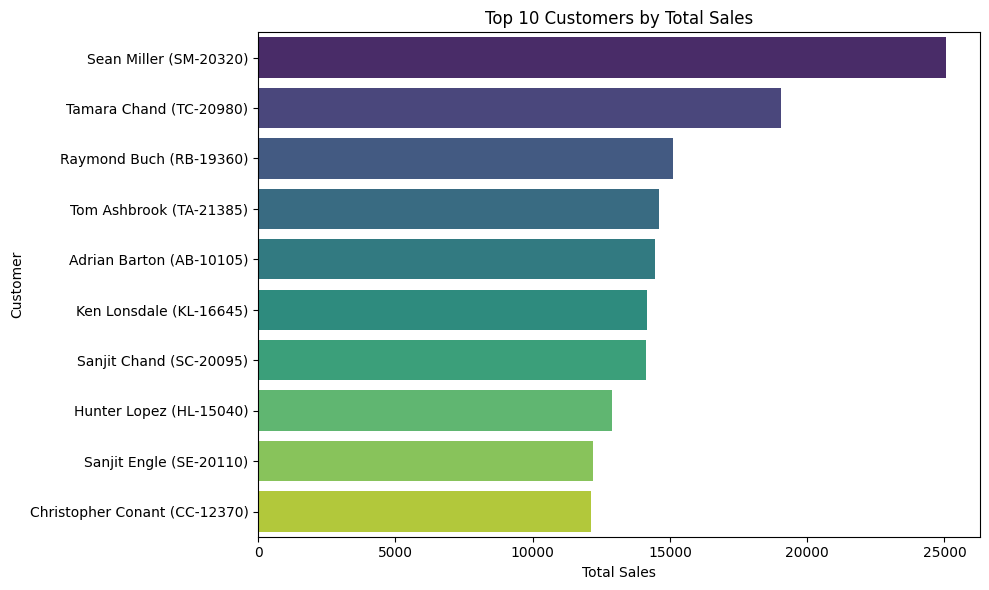

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column combining Customer Name and ID for clear labeling
top_loyal_customers['Customer'] = top_loyal_customers['Customer Name'] + " (" + top_loyal_customers['Customer ID'] + ")"

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_loyal_customers,
    y='Customer',
    x='Sales',
    palette='viridis'
)
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()